## Socio Economic Advantage Calculations

Within this package, the seifa_vic submodule allows for suburb level aggregation of socio economic data derived by Australian Bureau of Statistics from census data every 5 years.

## Data access

When this module is first run, it will pull down datasets from the Australian Bureau of Statistics, The State of Victoria Data repository, and AURIN. You will need to have an API access key and code in order to download the aurin data. You can get one by filling out the form at this [link](https://aurin.org.au/resources/aurin-apis/sign-up/).

once the form is filled out, you will be sent a username and password to be able to pull requests from the api.

### Storing the aurin api credentials in a config.ini

The username and password can either be entered into a config file in package repository folder in the config.ini file, copying the following example:

```toml
[aurin]
username = {your_aurin_username}
password = {your_aurin_password}
```

### Entering the aurin credentials on execution

However, if you do not set up the configuration file, you will be asked to enter your credentials when you run the seifa_vic module for the first time, and these will be saved with your user data.

## Using the seifa_vic module:
Once the data is loaded and ready to go, you can start making socio economic calculations
See below for a high level example of the `interpolate_vic_suburb_seifa` function.

### Calculating one value

In [1]:
from aucpi.seifa_vic.seifa_vic import interpolate_vic_suburb_seifa

In [2]:
help(interpolate_vic_suburb_seifa)

Help on function interpolate_vic_suburb_seifa in module aucpi.seifa_vic.seifa_vic:

interpolate_vic_suburb_seifa(year_values, suburb, variable, fill_value='extrapolate', **kwargs) -> <built-in function array>
    function to get an interpolated estimate of a SEIFA score for
        each victorian suburb from Australian Bureau of statistics data
    
        You can input 
        
    
    Args:
        year_values (int, float, np.ndarray like): The year or array of year values you want interpolated
        suburb (str): The name of the suburb that you want the data interpolated for
                variable (str): the name of the seifa_score variable, options are include 
                `irsd_score` for index of relative socio economic disadvantage,
                `ieo_score` for the index of education and opportunity, 
                `ier_score` for an index of economic resources, `irsad_score` for index of socio economic advantage and disadvantage,
                `uirsa_score` fo

In [3]:
interpolate_vic_suburb_seifa(2007, 'FOOTSCRAY', 'ier_score', fill_value='extrapolate')

874.1489807920245

## Calculation of multiple values

You can calculate multiple years by feeding in an np.array like for the year argument

In [4]:
interpolate_vic_suburb_seifa([2007, 2020], 'FOOTSCRAY', 'ier_score', fill_value='extrapolate')

array([874.14898079, 861.68112674])

## Different methods of extrapolation
The default setting is for the interpolator to extrapolate out to values before and after the first and last years in the dataset, this is set with the `fill_value` optional argument.

Other options include `"boundary_value"` which will set variables outside of the time span of data to the nearest data points. See below for an illustration

In [5]:
import pandas as pd

years = list(range(1980, 2020))
abbotsford_ier = interpolate_vic_suburb_seifa(years, 'abbotsford', 'ier_score', fill_value='boundary_value')
df = pd.DataFrame({'years':years, 'ier_boundary':abbotsford_ier})
df['eir_extrapolate'] = interpolate_vic_suburb_seifa(years, 'ABBOTSFORD', 'ier_score', fill_value='extrapolate')

fill_value now ('943.0315332534345', '952')


In [6]:
df.head()


,years,ier_boundary,eir_extrapolate
0,1980,943.031533,868.191431
1,1981,943.031533,880.664782
2,1982,943.031533,893.138132
3,1983,943.031533,905.611482
4,1984,943.031533,918.084833


<AxesSubplot:xlabel='years'>

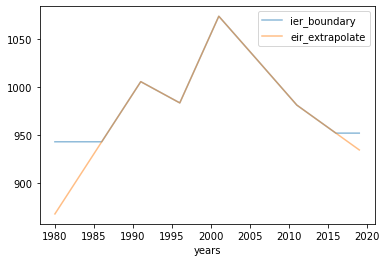

In [7]:

df.plot(x='years', y=['ier_boundary', 'eir_extrapolate'], alpha=0.5)

Note that the above graph shows the boundary_value vs the extrapolate fill_value patterns